In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SMSSpamCollection.csv')
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['Class'] = df['Class'].map({'spam' : 1, 'ham' : 0})

In [4]:
y = df['Class']
X = df.sms

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=3)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
vect = CountVectorizer(stop_words='english')

In [9]:
vect.fit(X_train)
X_traint = vect.transform(X_train)
X_testt = vect.transform(X_test)

In [10]:
type(X_traint)

#sparse matrix: matrix with mostly zeroes

scipy.sparse.csr.csr_matrix

In [11]:
X_traint.shape

(3900, 6900)

In [12]:
vect.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07808',
 '07808726822',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986906',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700621170150p',
 '08701237397',
 '08701417012',
 '0870141701216',
 '087016248',
 '08701752560',
 '0870187287

In [13]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [22]:
mnb = MultinomialNB()

Overall accuracy - train: 0.9943589743589744
Confusion matrix - train:  
 [[3373   12]
 [  10  505]]
AUC - train 0.995817642081714


Overall accuracy - test: 0.986244019138756
Confusion matrix - test:  
 [[1433    7]
 [  16  216]]
AUC - test 0.9847341954022989


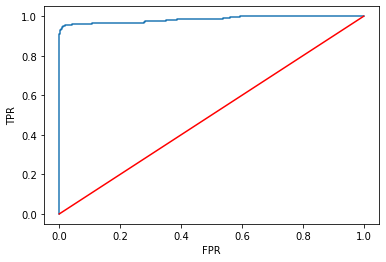

In [28]:
mnb.fit(X_traint,y_train)

y_train_pred = mnb.predict(X_traint)
y_train_prob = mnb.predict_proba(X_traint)[:,1]

print('Overall accuracy - train:' , accuracy_score(y_train, y_train_pred))
print('Confusion matrix - train: ','\n',confusion_matrix(y_train,y_train_pred))
print('AUC - train', roc_auc_score(y_train,y_train_prob))

y_test_pred = mnb.predict(X_testt)
y_test_prob = mnb.predict_proba(X_testt)[:,1]

print('\n')
print('Overall accuracy - test:' , accuracy_score(y_test, y_test_pred))
print('Confusion matrix - test: ','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - test', roc_auc_score(y_test,y_test_prob))


fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
#above fpr is 0%, but fpr cannot be 0%, as there is a possibility that a mail can be classfied as spam which is actually not spam

In [29]:
sms=pd.DataFrame ({'fpr': fpr , 'tpr':tpr , 'thresholds':thresholds})

In [30]:
sms.head()

,fpr,tpr,thresholds
0,0.0,0.000000,2.0
1,0.0,0.293103,1.0
2,0.0,0.301724,1.0
3,0.0,0.306034,1.0
4,0.0,0.323276,1.0


In [31]:
sms[sms['fpr']==0.0] #finding max tpr at fpr=0

,fpr,tpr,thresholds
0,0.0,0.000000,2.000000
1,0.0,0.293103,1.000000
2,0.0,0.301724,1.000000
3,0.0,0.306034,1.000000
4,0.0,0.323276,1.000000
5,0.0,0.327586,1.000000
6,0.0,0.336207,1.000000
7,0.0,0.344828,1.000000
8,0.0,0.362069,1.000000
9,0.0,0.387931,1.000000


1. when fpr = 0 , find the maximum tpr i.e 0.909483.
2. check its probability i.e threshold 0.917742.
3. after that probability mail will be sent to spam folder.

In [32]:
#after 91.7%threshold mail will be sent to spam folder even if its not a spam mail